In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("/content/drive/MyDrive/exam /news.csv")

In [5]:
df

,title,category
0,Wall St. Bears Claw Back Into the Black (Reuters),Business
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters),Business
3,Iraq Halts Oil Exports from Main Southern Pipe...,Business
4,"Oil prices soar to all-time record, posing new...",Business
...,...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...,World
119996,Renteria signing a top-shelf deal,Sports
119997,Saban not going to Dolphins yet,Sports
119998,Today's NFL games,Sports


In [ ]:
pip install transformers

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification


In [8]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [9]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [10]:
train_encodings = tokenizer(list(train_df['title']), truncation=True, padding=True)
test_encodings = tokenizer(list(test_df['title']), truncation=True, padding=True)

In [11]:
label_dict = {'Business': 0, 'Sci/Tech': 1, 'Sports': 2, 'World': 3}
train_labels = [label_dict[label] for label in train_df['category']]
test_labels = [label_dict[label] for label in test_df['category']]

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels))

In [13]:
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [15]:
history = model.fit(train_dataset.batch(32), epochs=3, batch_size=32, validation_data=test_dataset.batch(32))

Epoch 1/3
3000/3000 [==============================] - 1059s 335ms/step - loss: 0.3850 - accuracy: 0.8654 - val_loss: 0.3152 - val_accuracy: 0.8924
Epoch 2/3
3000/3000 [==============================] - 995s 332ms/step - loss: 0.2402 - accuracy: 0.9176 - val_loss: 0.3107 - val_accuracy: 0.8970
Epoch 3/3
3000/3000 [==============================] - 997s 332ms/step - loss: 0.1648 - accuracy: 0.9447 - val_loss: 0.3333 - val_accuracy: 0.8960


In [16]:
test_loss, test_accuracy = model.evaluate(test_dataset.batch(32), batch_size=32)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

750/750 [==============================] - 84s 112ms/step - loss: 0.3333 - accuracy: 0.8960
Test Loss: 0.3333055377006531
Test Accuracy: 0.8959583044052124


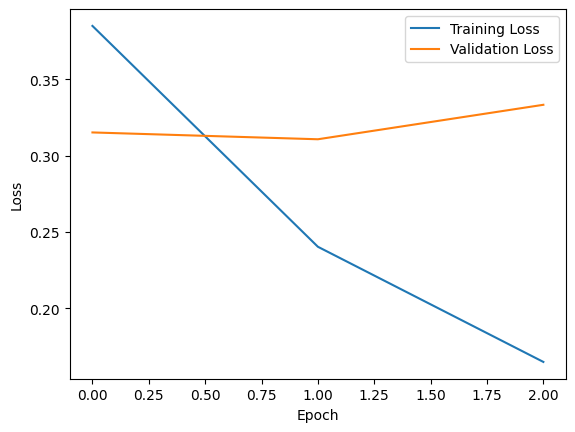

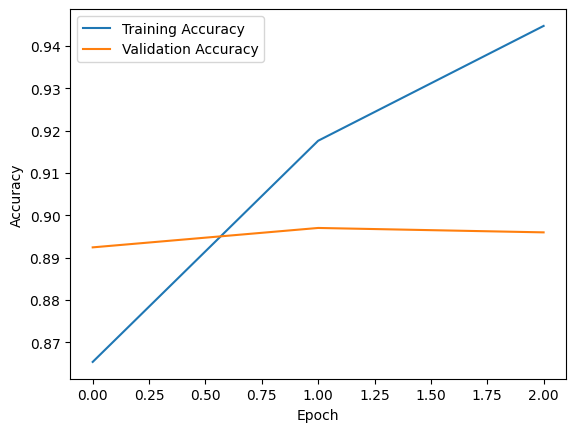

In [17]:
import matplotlib.pyplot as plt

# Get the training and validation loss
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Get the training and validation accuracy
training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

# Plot the training and validation loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(training_acc, label='Training Accuracy')
plt.plot(validation_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()